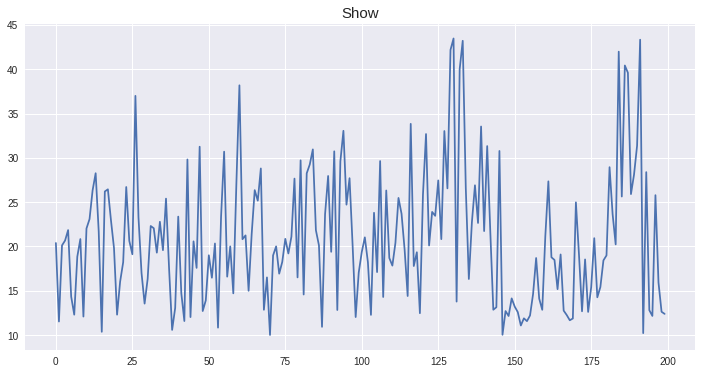

数据集长度： 200
数据集shape： (180, 8) (180,) (20, 8) (20,)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
plt.style.use('seaborn')
#读取数据 
cv=10#k折交叉
train_num=180#训练集数量

def load_data(train_num):
  #读取对应数据集
  data=pd.read_excel('数据.xlsx',header=None) 
  data=data.iloc[:,:]
  #展示一下看看
  plt.figure(figsize=(12,6))
  plt.plot(data.iloc[:,-1])
  plt.title('Show',fontsize='15') #添加标题
  plt.show()
  x=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  print('数据集长度：',len(x))
  x_train,y_train,x_test,y_test=x.iloc[:train_num,:],y.iloc[:train_num],x.iloc[train_num:,:],y.iloc[train_num:]
  print('数据集shape：',x_train.shape,y_train.shape,x_test.shape,y_test.shape)
  return x_train.values,y_train.values,x_test.values,y_test.values

#读取数据
x_train,y_train,x_test,y_test=load_data(train_num)

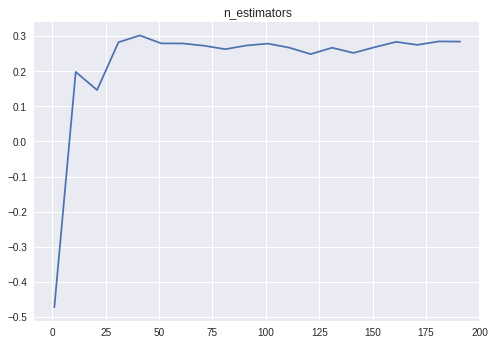

The best parameter: 41


In [6]:
#n_estimators
n_estimators_list=range(1,200,10)
record=[]
for n_estimators in n_estimators_list:
  model=RandomForestRegressor(n_estimators=n_estimators)
  r2=cross_val_score( model, x_train, y_train, cv=cv, scoring='r2').mean()
  record.append(r2)

plt.plot(n_estimators_list,record)
plt.title('n_estimators')
plt.show()
print('The best parameter:',n_estimators_list[np.array(record).argsort()[-1:][0]])

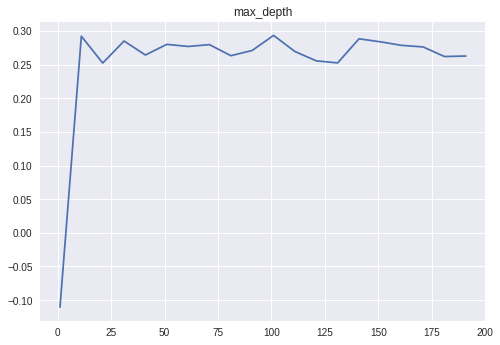

The best parameter: 101


In [7]:
#max_depth
max_depth_list=range(1,200,10)
record=[]
for max_depth in max_depth_list:
  model=RandomForestRegressor(max_depth=max_depth)
  r2=cross_val_score( model, x_train, y_train, cv=cv, scoring='r2').mean()
  record.append(r2)
plt.plot(max_depth_list,record)
plt.title('max_depth')
plt.show()
print('The best parameter:',max_depth_list[np.array(record).argsort()[-1:][0]])

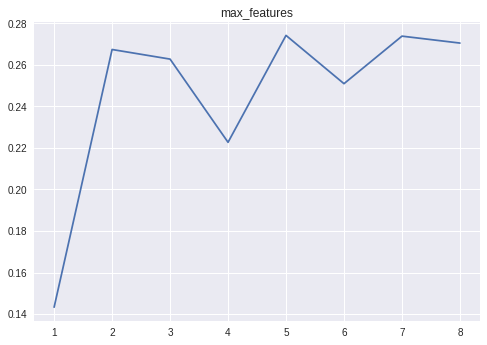

The best parameter: 5


In [8]:
#max_features
max_features_list=range(1,9,1)
record=[]
for max_features in max_features_list:
  model=RandomForestRegressor(max_features=max_features)
  r2=cross_val_score( model, x_train, y_train, cv=cv, scoring='r2').mean()
  record.append(r2)
plt.plot(max_features_list,record)
plt.title('max_features')
plt.show()
print('The best parameter:',max_features_list[np.array(record).argsort()[-1:][0]])

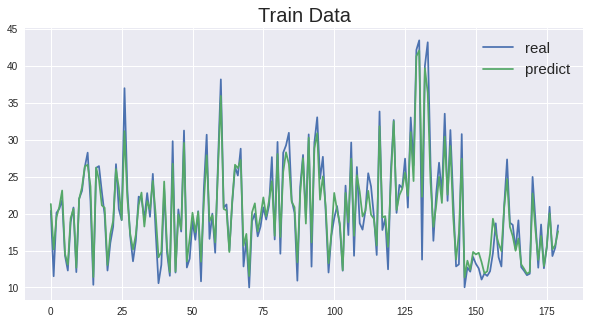

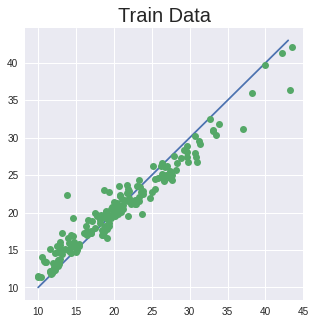

Train上的MAE/RMSE/R^2/MAPE
1.4306693766937675
1.9048205016481836
0.926791354695178
7.66981087558041


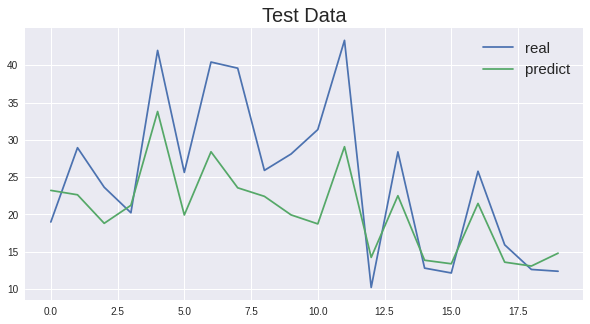

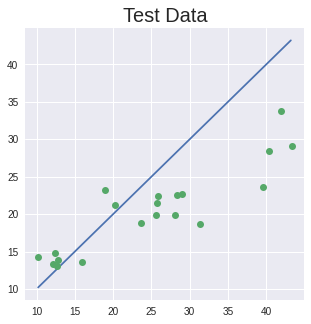

Test上的MAE/RMSE/R^2/MAPE
5.929292682926829
7.445566383331097
0.48255026961186653
21.515149218631656
特征重要程度
 [0.09408399 0.10297892 0.10171679 0.11887262 0.00177906 0.42961207
 0.09996785 0.05098868]


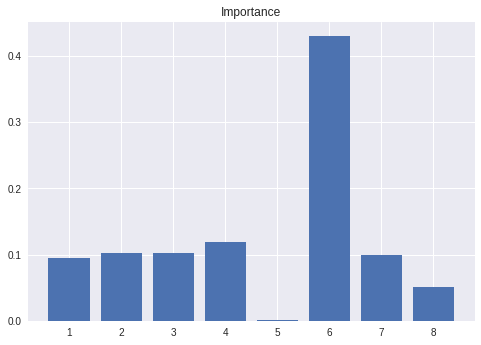

In [13]:
def mape(y_true, y_pred):
  #评价指标
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def easy_result(y_train,y_train_predict,train_index):
  #画图进行展示
  plt.figure(figsize=(10,5))
  plt.plot(y_train)
  plt.plot(y_train_predict)
  plt.legend(('real', 'predict'),fontsize='15')
  plt.title("%s Data"%train_index,fontsize='20') #添加标题
  plt.show()
  print('\n')
  plot_begin,plot_end=min(min(y_train),min(y_train_predict)),max(max(y_train),max(y_train_predict))
  plot_x=np.arange(plot_begin,plot_end,1)
  plt.figure(figsize=(5,5))
  plt.plot(plot_x,plot_x)
  plt.plot(y_train,y_train_predict,'o')
  plt.title("%s Data"%train_index,fontsize='20') #添加标题
  plt.show()
  #输出结果
  pd.DataFrame(y_train).to_csv('y_%s.csv'%train_index)
  pd.DataFrame(y_train_predict).to_csv('y_%s_predict.csv'%train_index)
  pd.DataFrame(x_train).to_csv('x_%s.csv'%train_index)
  print('%s上的MAE/RMSE/R^2/MAPE'%train_index)
  print(mean_absolute_error(y_train, y_train_predict))
  print(np.sqrt(mean_squared_error(y_train, y_train_predict)) )
  print(r2_score(y_train, y_train_predict) )
  print(mape(y_train, y_train_predict) )
def model_result(model):
  #输出当前模型下的结果
  model = model.fit(x_train, y_train) 
  y_train_predict=model.predict(x_train)
  easy_result(y_train,y_train_predict,'Train')
  y_test_predict=model.predict(x_test)
  easy_result(y_test,y_test_predict,'Test')
  feature_important=model.feature_importances_
  print('特征重要程度\n',feature_important)
  plt.bar(range(1,len(feature_important)+1,1),feature_important)  
  plt.title('Importance')                
  plt.show()

n_estimators=41
max_depth=101
max_features=5
model=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
model_result(model)